In [1]:
# Required imports for the Project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading in the Dataset
df_attrition_data = pd.read_csv(r'./IBM Attrition Data.csv')

In [3]:
df_attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
# Exploring to better understand the Dataset
print(f'size: {df_attrition_data.size}')
print(f'shape: {df_attrition_data.shape}')
print(f'columns: {df_attrition_data.columns}')
# From exploring we observe that the response is the attrition column, whilst the others are the features

size: 19110
shape: (1470, 13)
columns: Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


### EXPLORATORY DATA ANALYSIS 

##### 1)Find the age distribution of employees in IBM: Through an Histogram

In [ ]:
# Extracting the age column from the dataset
ages_of_employees = df_attrition_data['Age']

In [ ]:
# define the x_axis
x_axis = ages_of_employees

In [ ]:
# Additional imports for the plot
from matplotlib import style
%matplotlib inline

In [ ]:
# Configuration for the Histogram plot and creating the plot
style.use('ggplot')
plt.figure(figsize=(10, 10))
h = plt.hist(x_axis, bins=42, facecolor='g')
plt.xlim(17, 61)
plt.ylim(0, 80)
plt.title('AGE DISTRIBUTION OF EMPLOYEES IN IBM')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

##### 2)Explore attrition by age: Through a Grouped Bar Chart

In [ ]:
# First the age and the Attrition columns are extracted
df_attrition_by_age = df_attrition_data[['Attrition', 'Age']]
df_attrition_by_age.head()

In [ ]:
# Extracting the age and the corresponding number of attrition status(Yes and No) into lists.
employee_ages = df_attrition_by_age.groupby('Age')
age_labels = []
attrition_value_yes = []
attrition_value_no = []
for age in range(18, 61):
    each_age = employee_ages.get_group(age)
    age_labels.append(age)
    attrition_value_yes.append(len(each_age[each_age.Attrition == "Yes"]))
    attrition_value_no.append(len(each_age[each_age.Attrition == "No"]))

In [ ]:
# Addtional imports for the plot
from matplotlib import style
%matplotlib inline

In [ ]:
# Creating and configuring the Grouped Bar Chart
x = np.arange(len(age_labels))
width = 0.5
style.use('ggplot')
plt.figure(figsize=(13, 7), tight_layout=True)
plt.ylim(0, 70)
yesBar = plt.bar(x - width/2, attrition_value_yes, width, label='Yes')
noBar = plt.bar(x + width/2, attrition_value_no, width, label='No')
plt.xticks(x, age_labels)
plt.legend()
plt.title('LEVEL OF ATTRITION OF EMPLOYEES PER AGE')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.bar_label(yesBar, padding=3)
plt.bar_label(noBar, padding=3)
plt.show()

##### 3)EXPLORE THE DATA FOR LEFT EMPLOYEES

In [5]:
# Interpreting this as the data for employees that have left the company that is Employees with an attrtion status of YES.
# Extracting the data for employees with an attrition status 'Yes'
employee_attrition_status = df_attrition_data.groupby('Attrition')
left_employee = employee_attrition_status.get_group('Yes')

In [6]:
# Viewing the shape
left_employee.shape

(237, 13)

In [7]:
# Viewing the size
left_employee.size

3081

In [8]:
# Viewing the first five records
left_employee.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4


In [9]:
# Exploring various stats of each column
left_employee.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.839662,2.464135,2.468354,4787.092827,2.940928,2.658228,5.130802
std,9.689350,8.452525,1.008244,1.169791,1.118058,3640.210367,2.678519,0.816453,5.949984
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,2.000000,1.000000,1.000000,2373.000000,1.000000,2.000000,1.000000
50%,32.000000,9.000000,3.000000,3.000000,3.000000,3202.000000,1.000000,3.000000,3.000000
75%,39.000000,17.000000,4.000000,4.000000,3.000000,5916.000000,5.000000,3.000000,7.000000
max,58.000000,29.000000,5.000000,4.000000,4.000000,19859.000000,9.000000,4.000000,40.000000


In [10]:
# Exploring the correlations between the columns
correlations = left_employee.corr()
correlations

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,0.033881,0.192184,-0.030219,0.031509,0.500602,0.349638,-0.075944,0.452909
DistanceFromHome,0.033881,1.000000,0.044774,0.019447,-0.046744,0.038948,-0.121304,-0.060009,-0.029204
Education,0.192184,0.044774,1.000000,-0.037230,-0.075939,0.105162,0.056101,-0.102884,0.157490
EnvironmentSatisfaction,-0.030219,0.019447,-0.037230,1.000000,0.046915,-0.089457,-0.167016,-0.099402,0.031420
JobSatisfaction,0.031509,-0.046744,-0.075939,0.046915,1.000000,0.004767,-0.030340,-0.042071,0.095849
MonthlyIncome,0.500602,0.038948,0.105162,-0.089457,0.004767,1.000000,0.187627,0.002965,0.634973
NumCompaniesWorked,0.349638,-0.121304,0.056101,-0.167016,-0.030340,0.187627,1.000000,-0.051898,-0.000311
WorkLifeBalance,-0.075944,-0.060009,-0.102884,-0.099402,-0.042071,0.002965,-0.051898,1.000000,-0.032627
YearsAtCompany,0.452909,-0.029204,0.157490,0.031420,0.095849,0.634973,-0.000311,-0.032627,1.000000


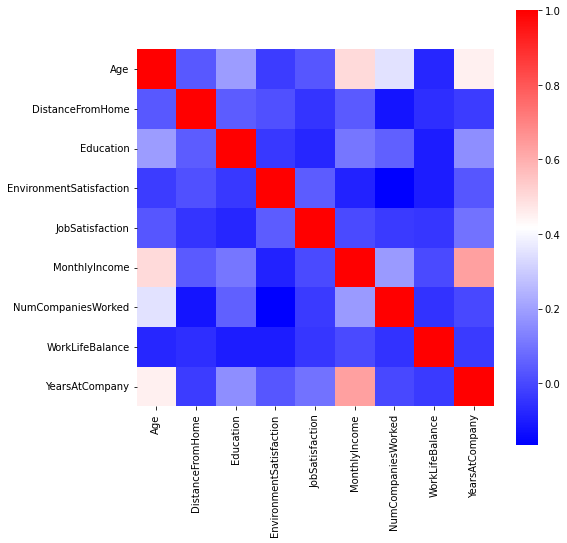

In [11]:
# Generating a heatmap to better explore the data of the left employees
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlations, square=True, cmap='bwr')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()